In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Catphan = np.load('/home/xcite/MV_CBCT/projections/Catphan.npy')
Catphan2 = np.load('/home/xcite/MV_CBCT/projections/Catphan2.npy')
Air = np.load('/home/xcite/MV_CBCT/projections/air.npy')

In [3]:
projections = -np.log(Catphan2/Air)

In [4]:
# fc_catphan = np.load('../fastcat/data/recons/Catphan_404.npy')
fc_proj = np.load('../fastcat/data/projs/Catphan_404.npy')

<IPython.core.display.Javascript object>


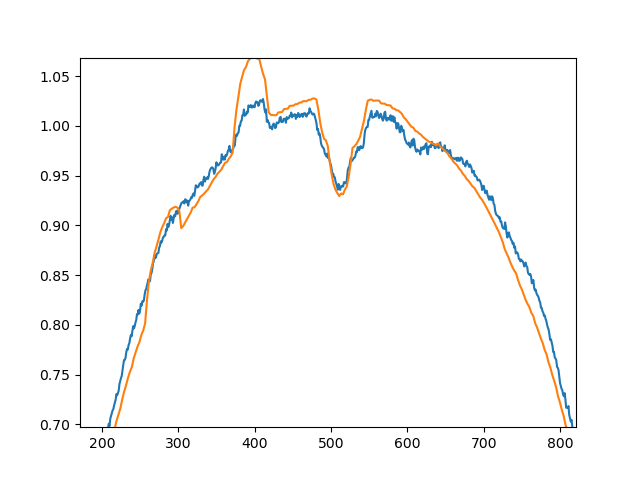

In [11]:
plt.figure()
plt.plot(np.mean(projections[0,250:280],0))
plt.plot(np.linspace(0,1024,len(np.mean(fc_proj[-20],0)[50:-50])),np.mean(fc_proj[-3,2:-2],0)[50:-50]/11.43)

<IPython.core.display.Javascript object>


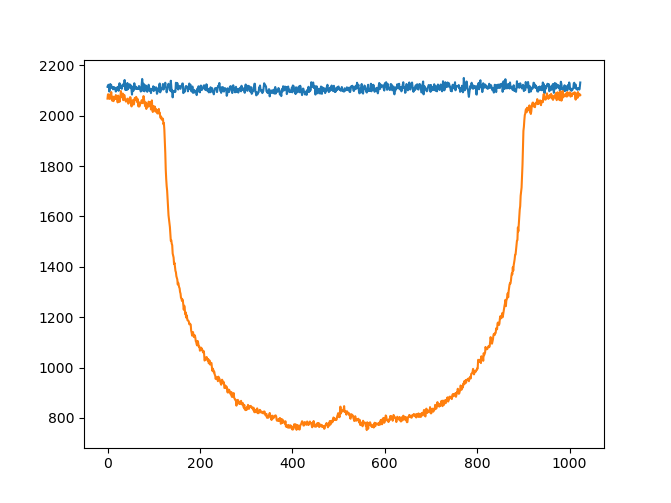

In [28]:
plt.figure()
plt.plot(Air[0,300])
plt.plot(Catphan2[0,300])
# plt.plot(np.linspace(0,1024,len(np.mean(fc_proj[3],0)[50:-50])),np.mean(fc_proj[3,2:-2],0)[50:-50]/11.43)

<IPython.core.display.Javascript object>


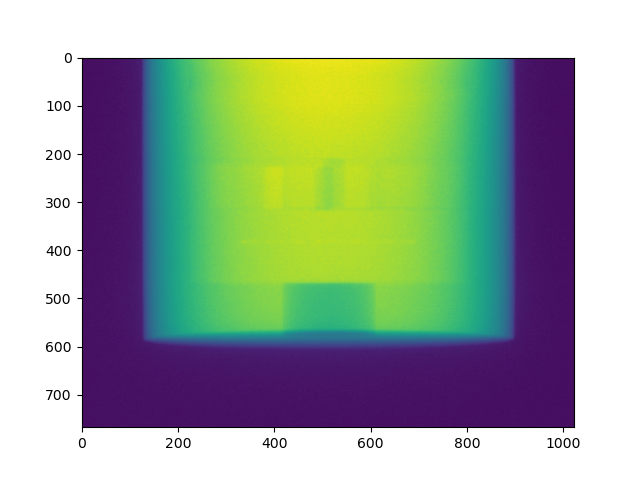

In [8]:
plt.figure()
plt.imshow(projections[0])

In [25]:
mc_int = np.load('/home/xcite/scintillators/MV_CBCT_exp/analysis/2020-11-17-h09m34/composite.npy')
mc_air = np.load('/home/xcite/scintillators/MV_CBCT_exp/analysis/2020-11-17-h09m34/Readout_prim_air.phsp.npy')

In [26]:
mc_proj = -np.log(mc_int/mc_air)

<IPython.core.display.Javascript object>


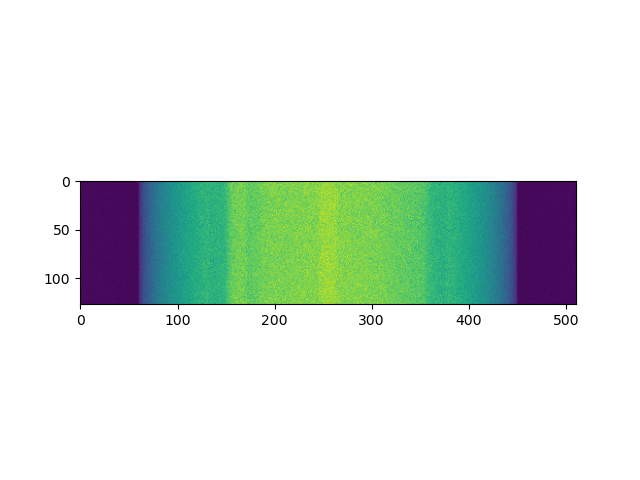

In [27]:
plt.figure()
plt.imshow(mc_proj)

<IPython.core.display.Javascript object>


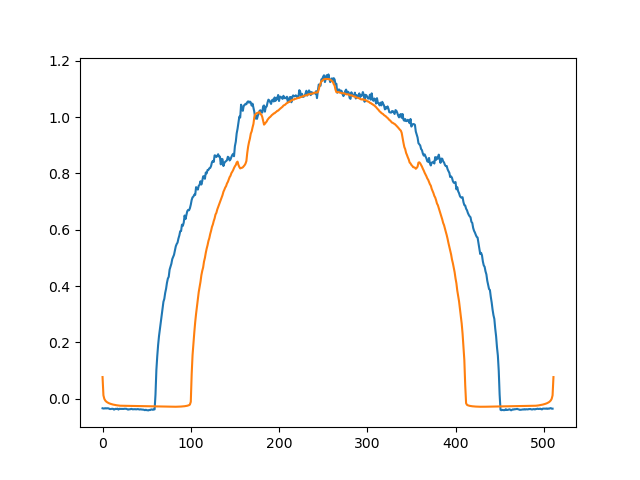

In [44]:
plt.figure()
plt.plot(np.mean(mc_proj[50:100],0))
plt.plot(np.mean(fc_proj[270,10:-10]/10.8,0))